# Business Problem

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [17]:
Airlines = pd.read_csv("C:\\Users\\admin\\Downloads\\Excelr Assignments\\Clustering\\EastWestAirlines.csv")

# Previewing data

In [18]:
Airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
Airlines = Airlines.drop(('ID'),axis=1)
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Exploratory data Analysis

# Checking for null values

In [20]:
Airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# Checking for duplicated values

In [33]:
Airlines.duplicated().sum()

1

In [36]:
Airlines[Airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


# Removed Duplicate Row

In [40]:
Airlines.drop(3876,axis=0,inplace=True)

# Checking for shape of data

In [41]:
Airlines.shape

(3998, 11)

# Summary of Data

In [43]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award              3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


All columns data are numeical data all are integers 

# View the statistical summary of numerical variables

In [44]:
Airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


# EDA

# Analyze feature by histogram

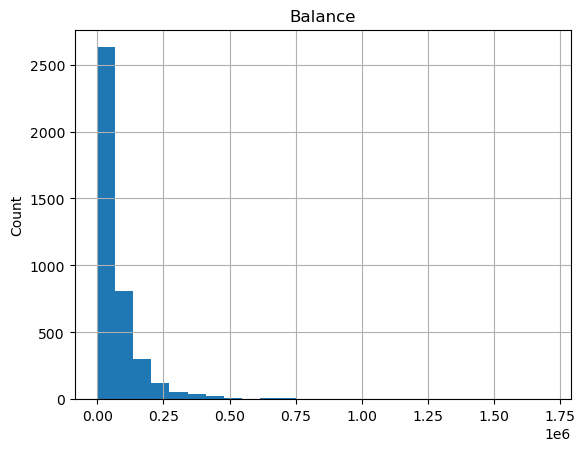

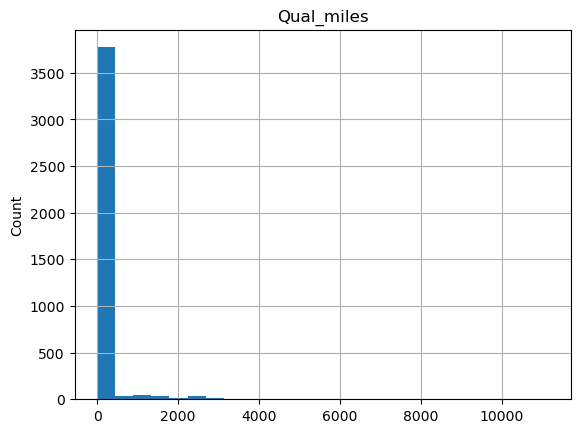

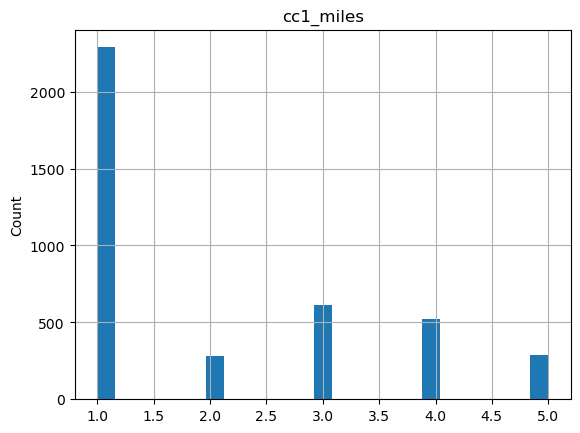

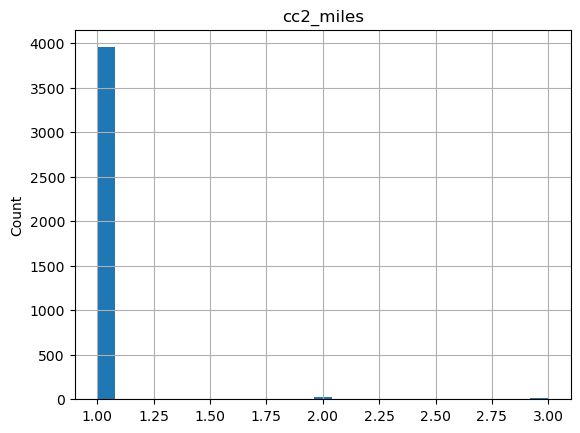

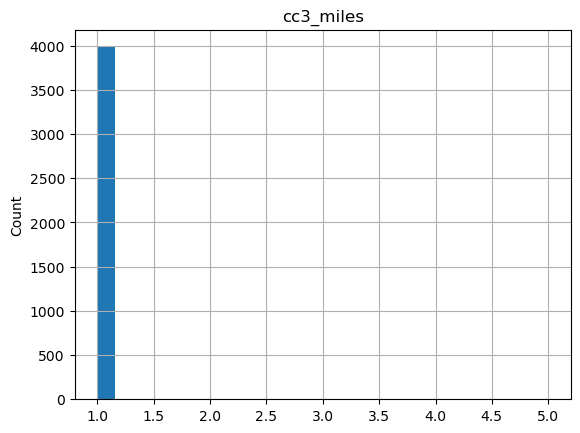

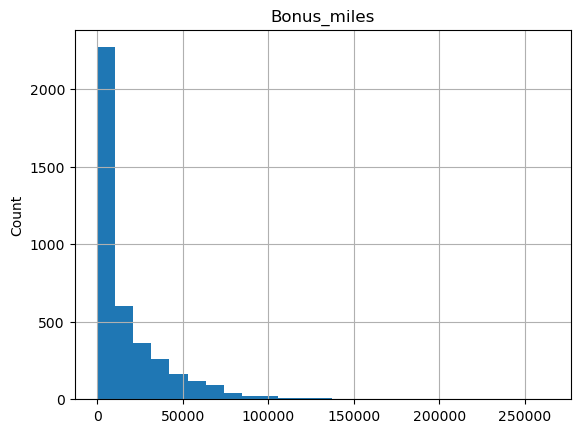

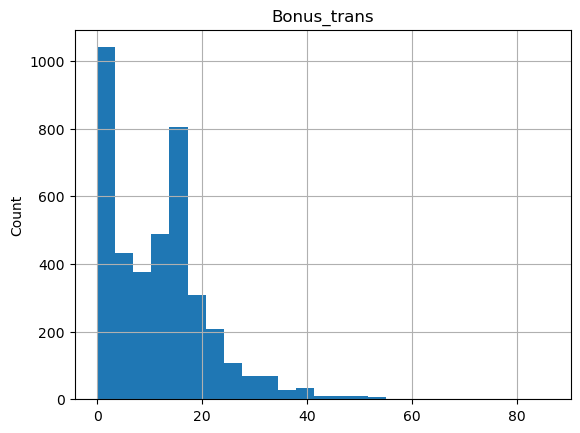

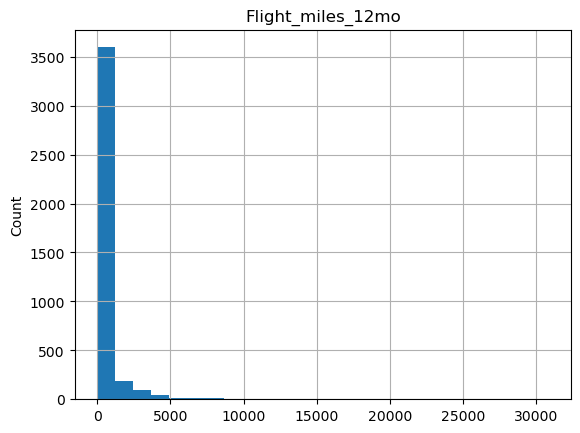

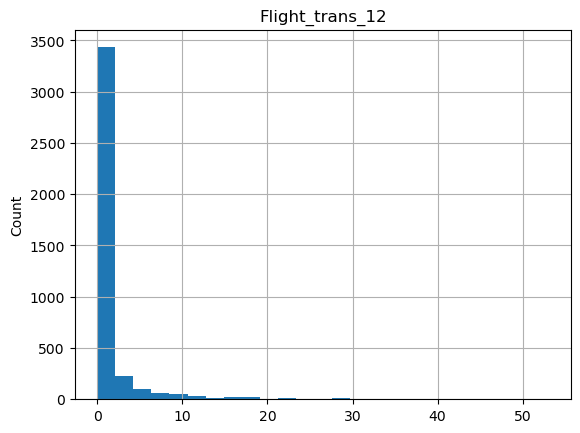

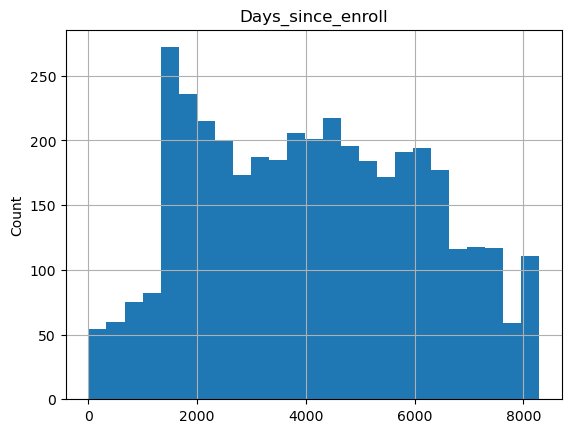

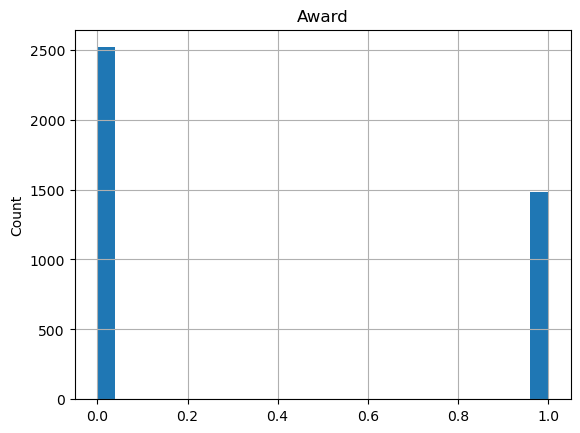

In [45]:
for feature in Airlines.columns:
    Airlines=Airlines.copy()
    Airlines[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


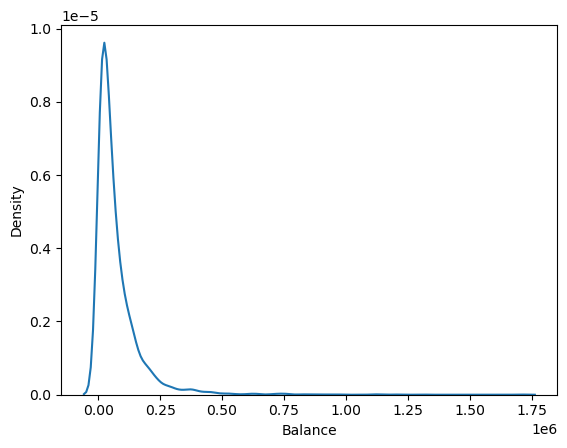

Qual_miles


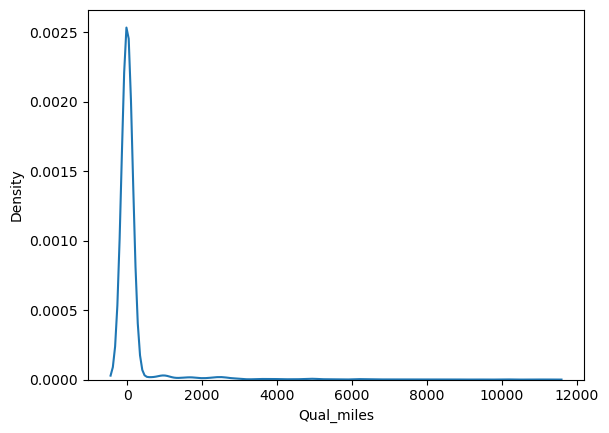

cc1_miles


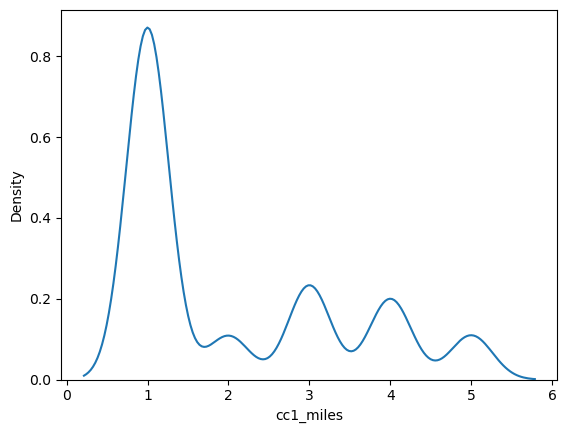

cc2_miles


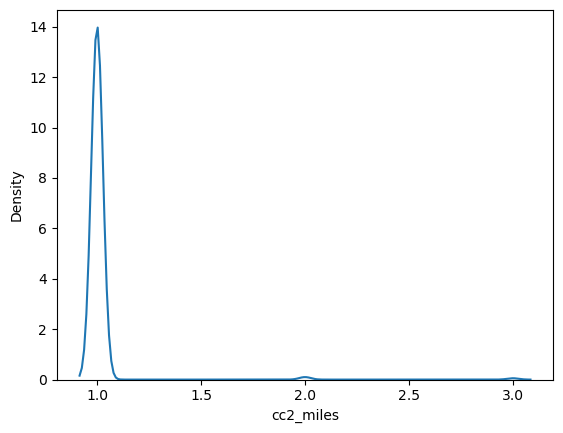

cc3_miles


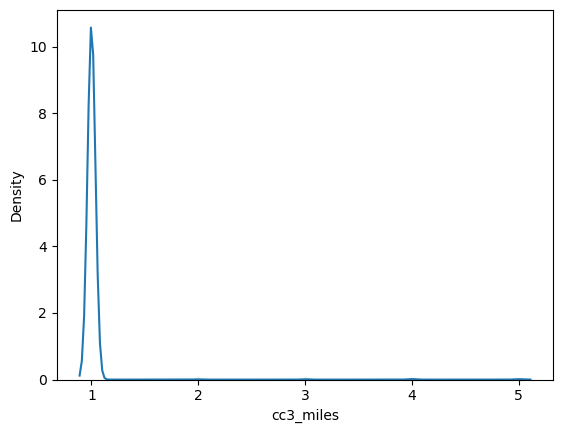

Bonus_miles


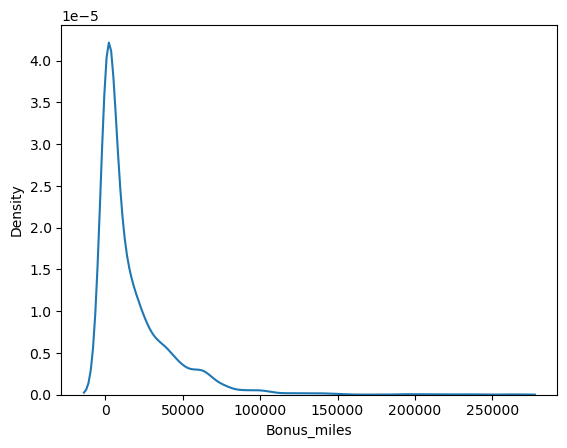

Bonus_trans


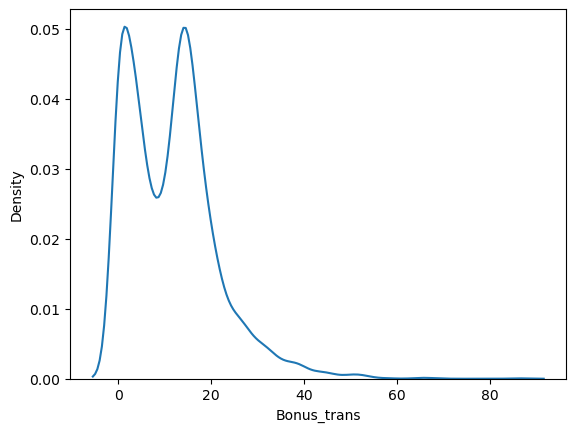

Flight_miles_12mo


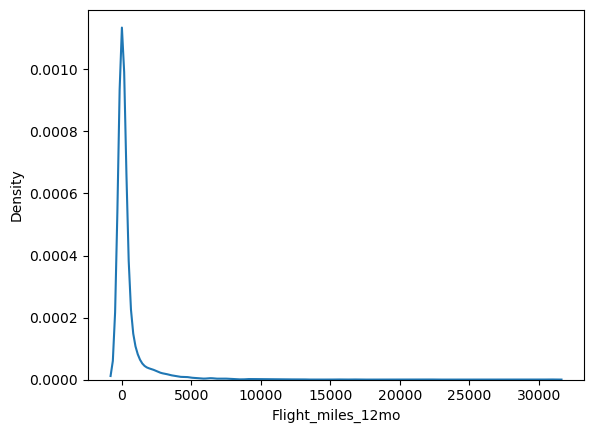

Flight_trans_12


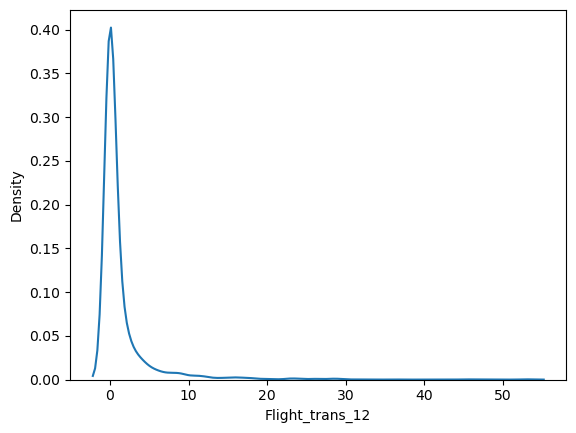

Days_since_enroll


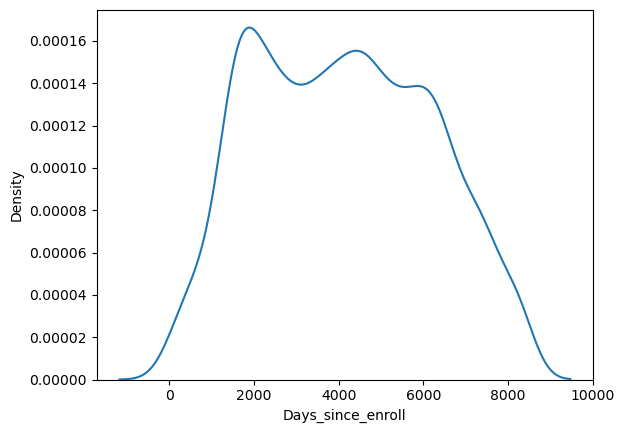

Award


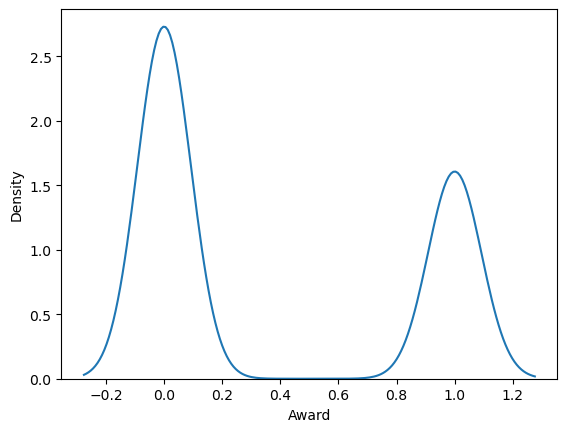

In [46]:
# Kernel Density for every feature, singled out

for n in Airlines.columns:
    print(n)
    sns.kdeplot(Airlines[n])
    plt.show()

In [48]:
Airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

# Outliers Detection

<Axes: >

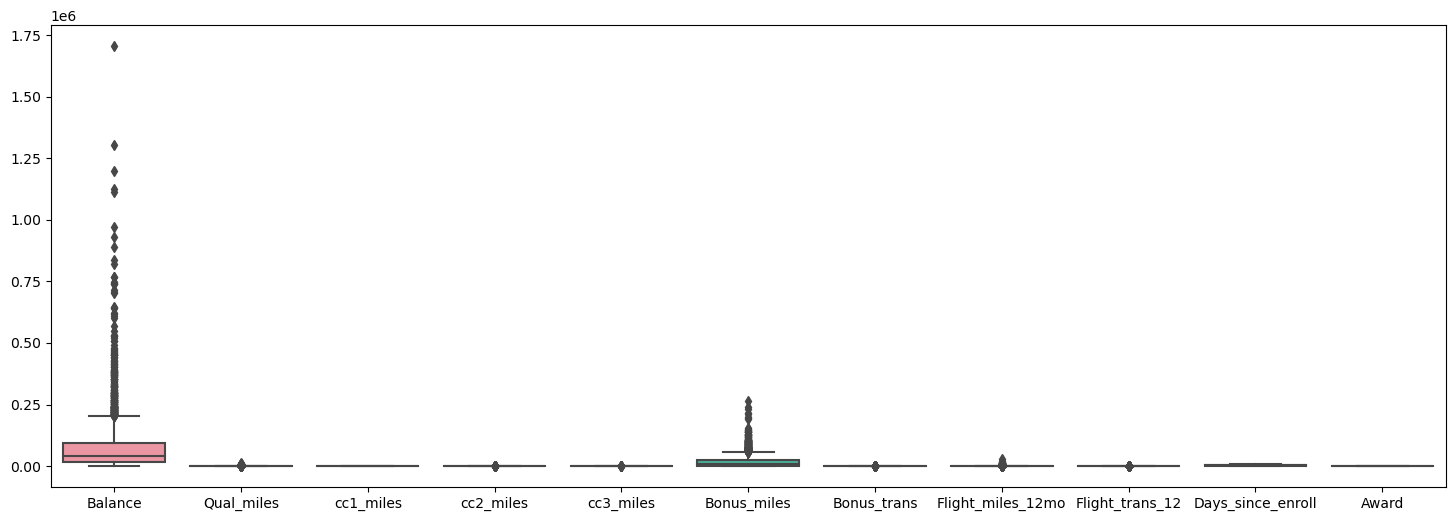

In [54]:
plt.figure(figsize=(18,6))
sns.boxplot(data=Airlines)

# Checking Correlation

In [55]:
correlation = Airlines.corr()

<Axes: >

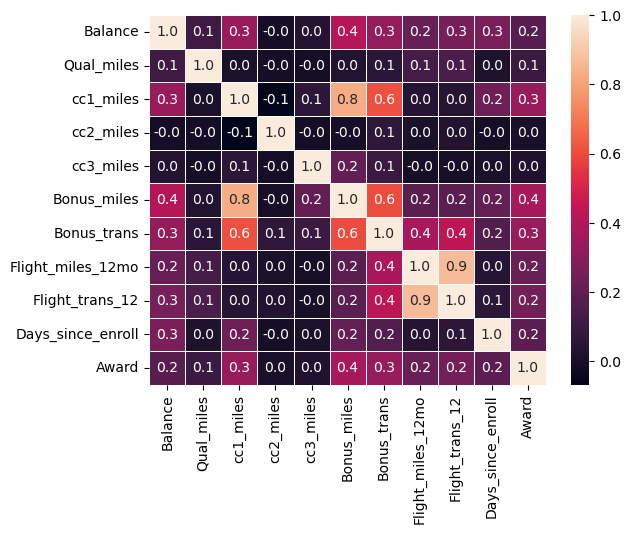

In [59]:
sns.heatmap(correlation,annot=True,linewidths =.5, fmt ='.1f')

## Data Preprocessing

## Scaling data

In [62]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(Airlines)
std_df.shape

(3998, 11)

# Normalizing data

In [63]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(Airlines)
minmax_df.shape

(3998, 11)

# K Means Clustering

In [64]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(std_df)

KMeans(n_clusters=2, random_state=0)

In [65]:
kmeans.cluster_centers_

array([[ 0.58694552,  0.14664101,  1.12603941, -0.03068253,  0.12590582,
         1.00471058,  0.91371623,  0.36223857,  0.40319501,  0.39741929,
         0.69976227],
       [-0.28378108, -0.07089916, -0.54442648,  0.01483463, -0.06087395,
        -0.48576545, -0.44177078, -0.17513798, -0.19493993, -0.19214743,
        -0.33832662]])

In [66]:
kmeans.inertia_

35402.34837621175

## Elbow method


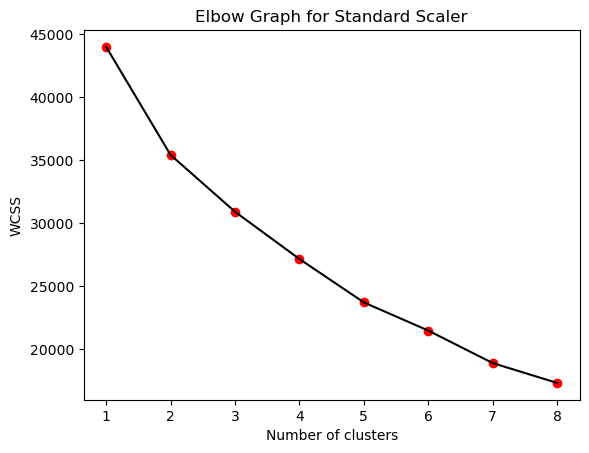

In [68]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### there is no clear visibility for to take particular clusters

In [76]:
wcss

[43978.00000000004,
 35402.34114281715,
 30899.260905703868,
 27148.562802612058,
 23702.268099909415,
 21468.661685069754,
 18890.63832460416,
 17314.499687910313]

##  Silhouette Score

In [77]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    Kmeans = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, Kmeans.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [74]:
silhouette_avg

0.26212592608239865

### Build Cluster algorithm


### for scaled data


In [79]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(std_df)

KMeans(n_clusters=4, random_state=42)

### For minmax scaling data

In [81]:
from sklearn.cluster import KMeans
clusters = KMeans(4, random_state=42)
clusters.fit(minmax_df)

KMeans(n_clusters=4, random_state=42)

In [82]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [84]:
cluster= pd.DataFrame(clusters_new.labels_, columns =['clusters'])

In [85]:
cluster1 = pd.concat([Airlines,cluster], axis=1)
cluster1.head(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,1.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,1.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,1.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0


In [94]:
cluster1['clusters'].value_counts()

1.0    1890
3.0     808
0.0     673
2.0     627
Name: clusters, dtype: int64

In [89]:
centroids = clusters_new.cluster_centers_

In [90]:
centroids

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.37803979e-02,  8.07552260e-03,  2.24867725e-02,
         8.99470899e-03,  1.05820106e-03,  1.25816849e-02,
         7.51937984e-02,  7.36057007e-03,  1.24388539e-02,
         4.34552166e-01, -9.43689571e-16],
       [ 6.92010150e-02,  7.21537510e-03,  6.40350877e-01,
         7.97448166e-04,  5.58213716e-03,  1.17843075e-01,
         2.00289307e-01,  7.30214826e-03,  1.19466763e-02,
         5.38787863e-01,  1.55431223e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

Text(0.5, 1.0, 'clusters of standardscaling_data ')

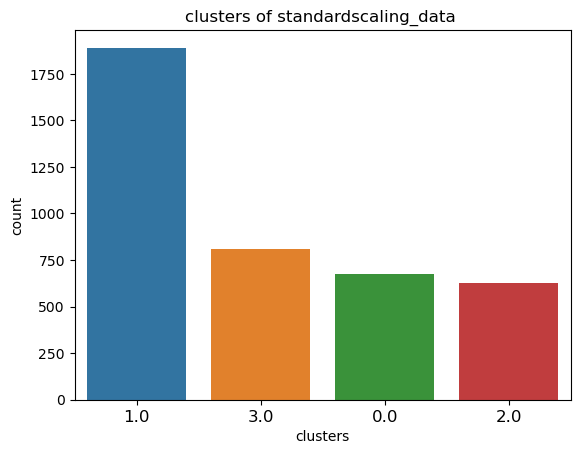

In [123]:
sns.countplot(x='clusters', data=cluster1, 
              order=cluster1['clusters'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('clusters of standardscaling_data ')

## For k=6

In [95]:
from sklearn.cluster import KMeans
clusters_new1 = KMeans(6, random_state=42)
clusters_new1.fit(std_df)

KMeans(n_clusters=6, random_state=42)

In [104]:
cluster2= pd.DataFrame(clusters_new1.labels_, columns =['clusters'])

In [105]:
cluster3 = pd.concat([Airlines,cluster2], axis=1)
cluster3.head(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0.0


In [107]:
cluster3['clusters'].value_counts()

0.0    2478
3.0    1262
2.0     139
5.0      61
4.0      43
1.0      15
Name: clusters, dtype: int64

Text(0.5, 1.0, 'clusters of data for k=6')

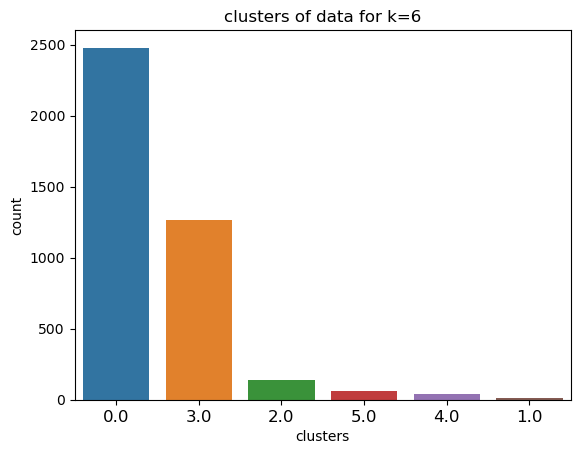

In [122]:
sns.countplot(x='clusters', data=cluster3, 
              order=cluster3['clusters'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('clusters of data for k=6')

# For minmaxscaling

In [114]:
from sklearn.cluster import KMeans
clusters = KMeans(4, random_state=42)
clusters.fit(minmax_df)

KMeans(n_clusters=4, random_state=42)

In [115]:
cluster4= pd.DataFrame(clusters.labels_, columns =['clusters'])

In [116]:
cluster5 = pd.concat([Airlines,cluster4], axis=1)
cluster5.head(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,1.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,1.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,1.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0


In [117]:
cluster5['clusters'].value_counts()

1.0    1890
3.0     808
0.0     673
2.0     627
Name: clusters, dtype: int64

Text(0.5, 1.0, 'clusters for minmaxscaling_data ')

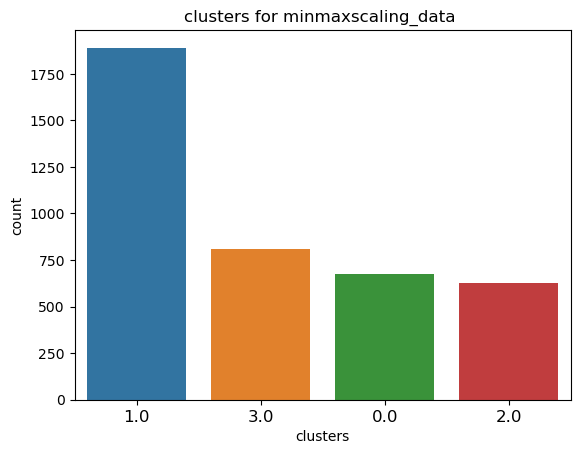

In [121]:
sns.countplot(x='clusters', data=cluster5, 
              order=cluster5['clusters'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('clusters for minmaxscaling_data ')

## Hierarichal Clustering

In [124]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [125]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [126]:
df_norm = norm_func(Airlines.iloc[:,1:])
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


## Dendrogram using Normalised data

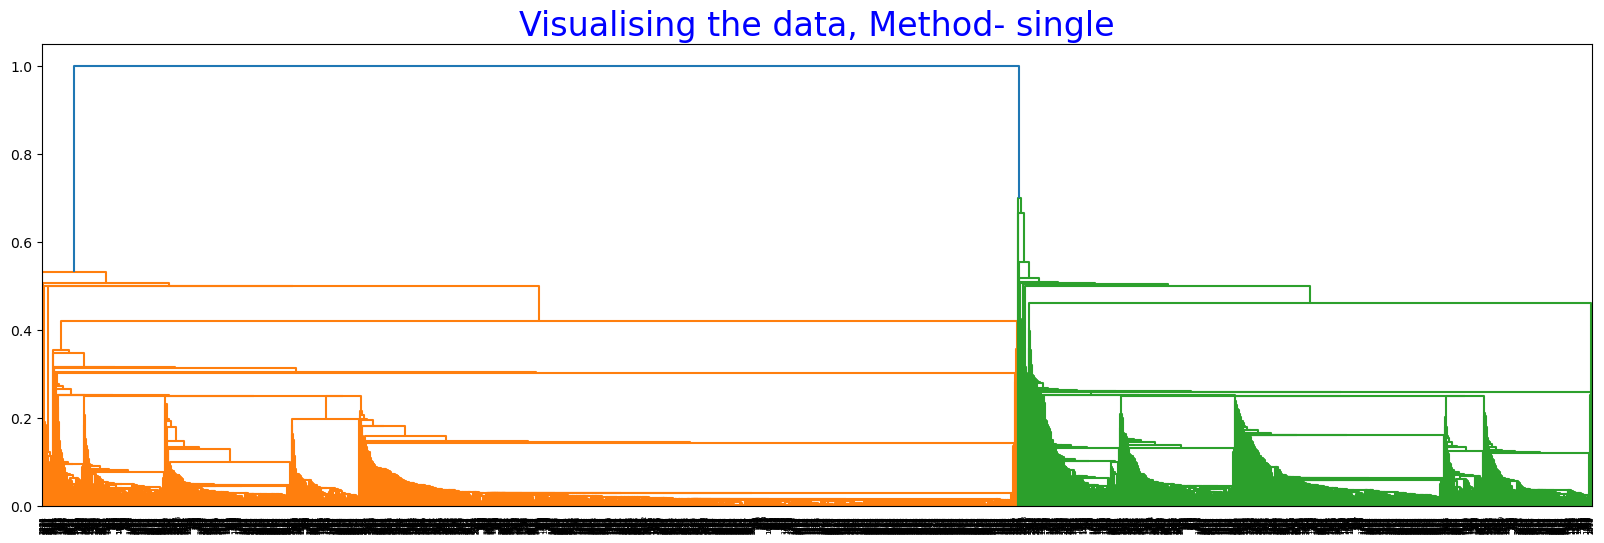

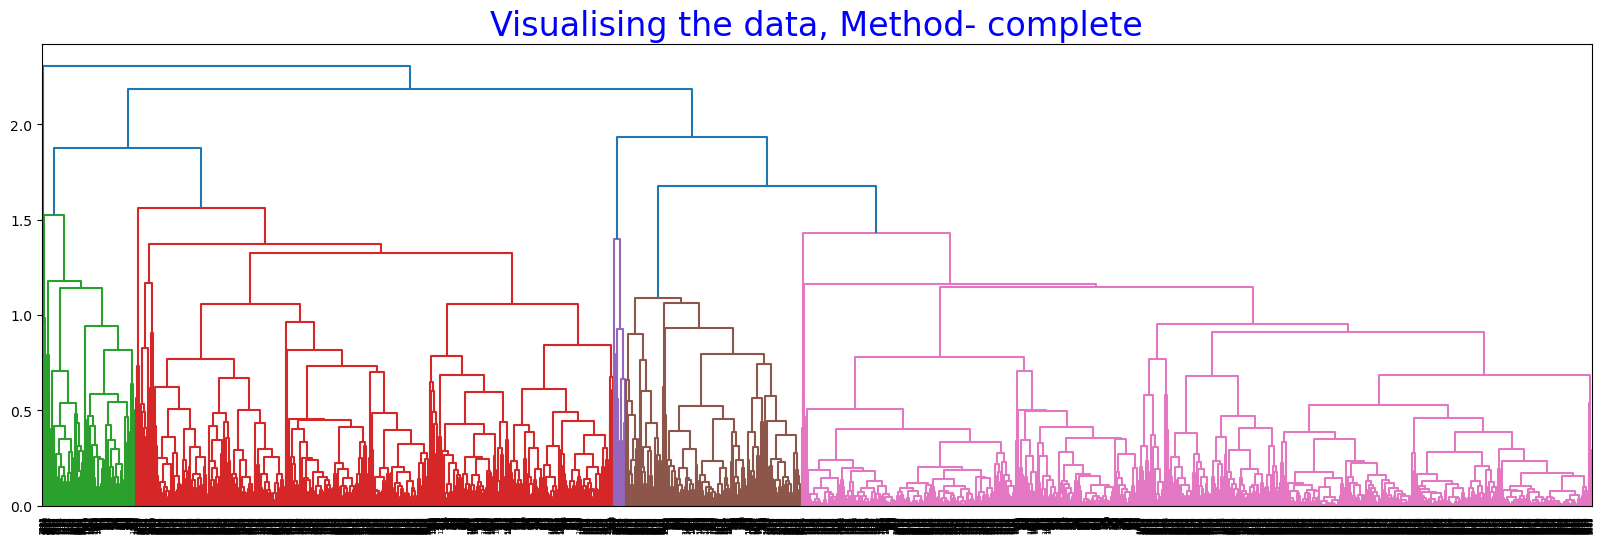

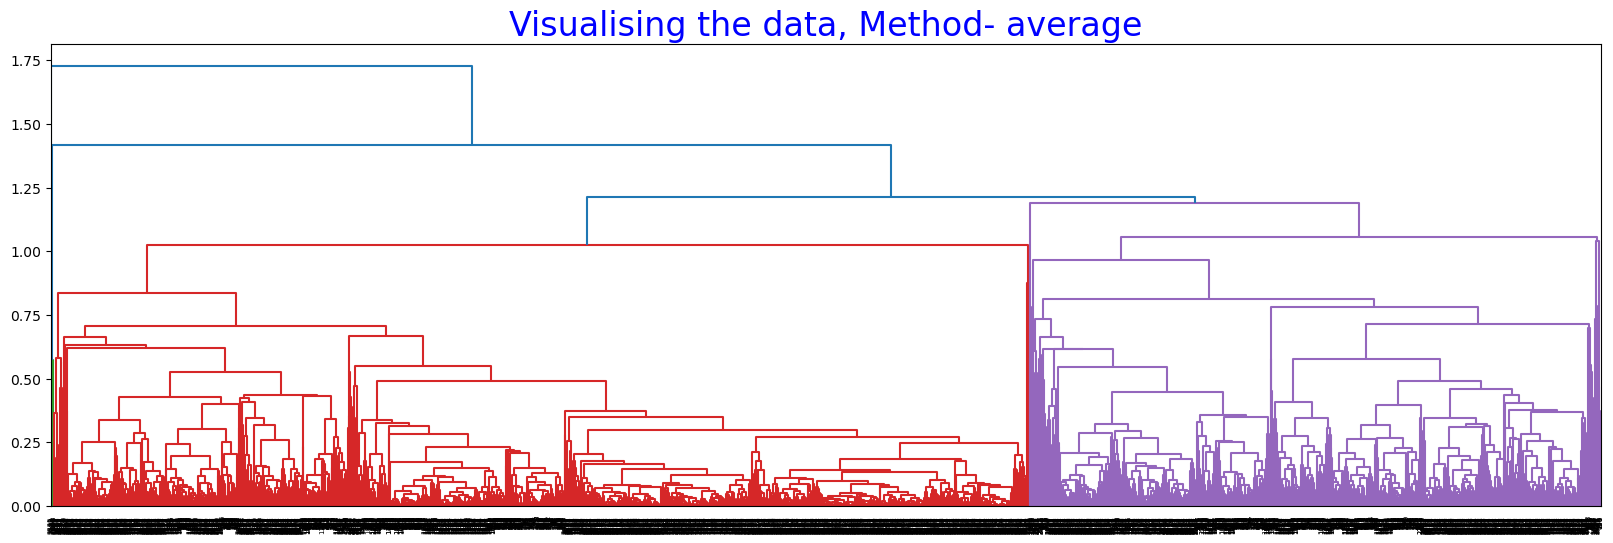

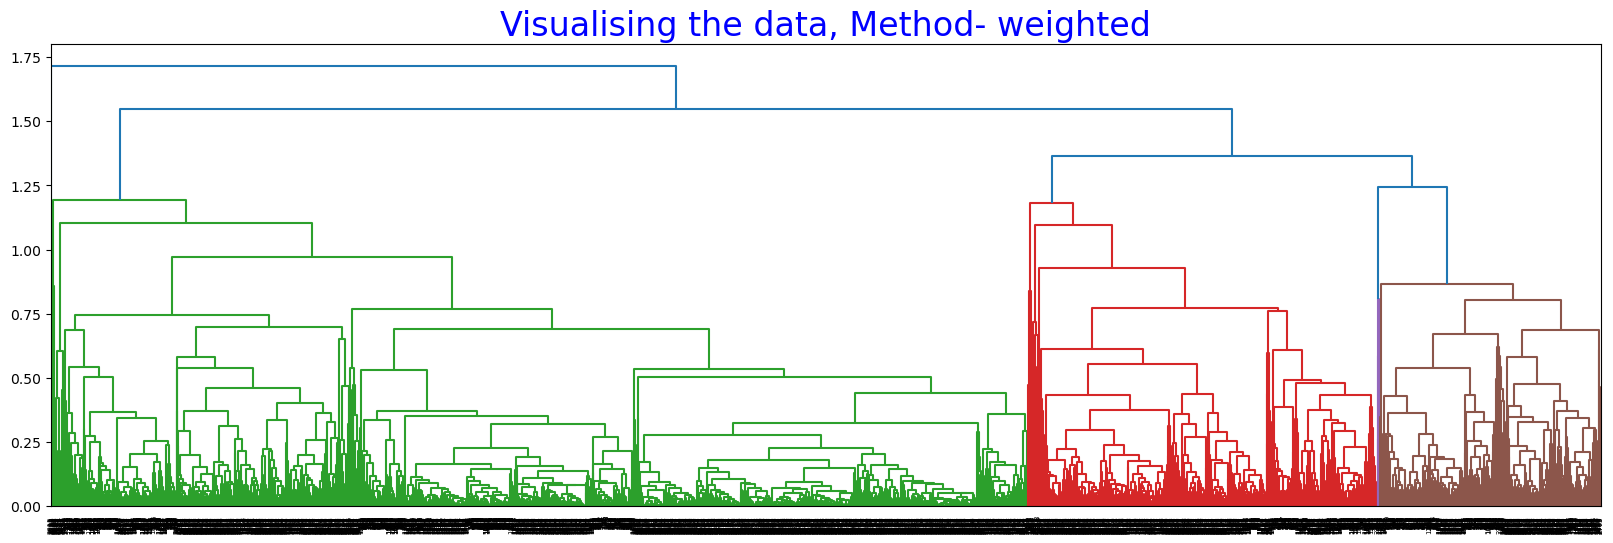

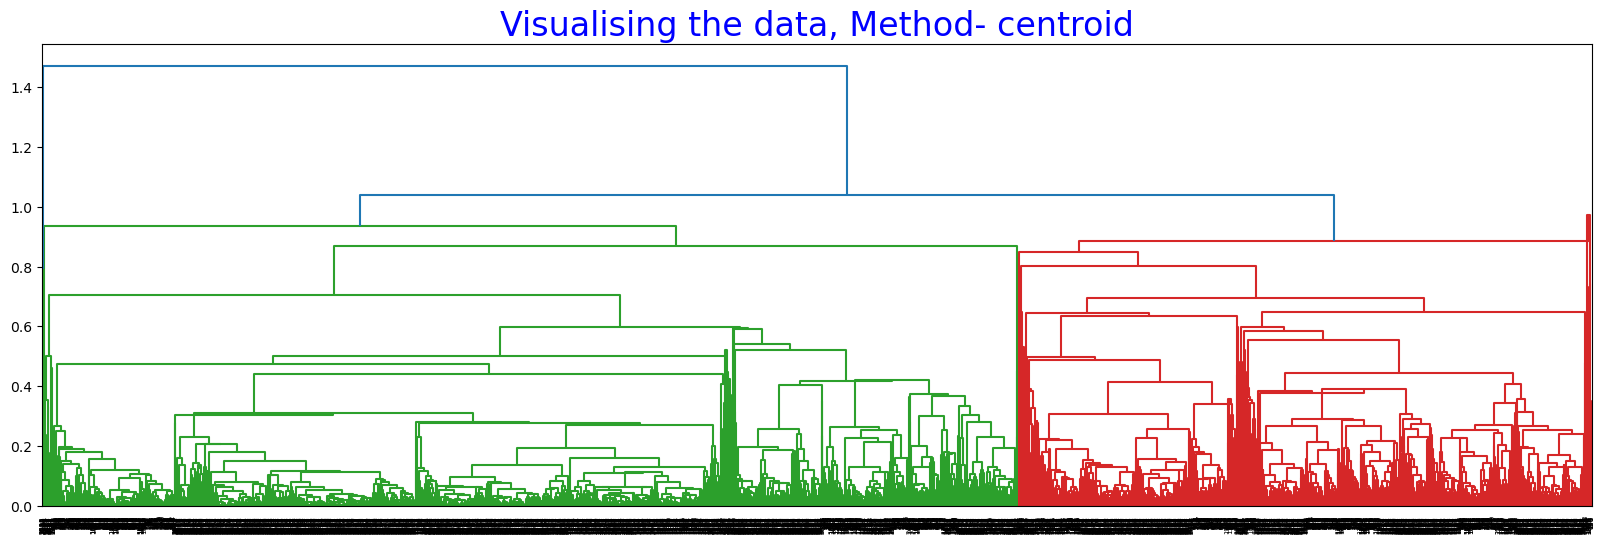

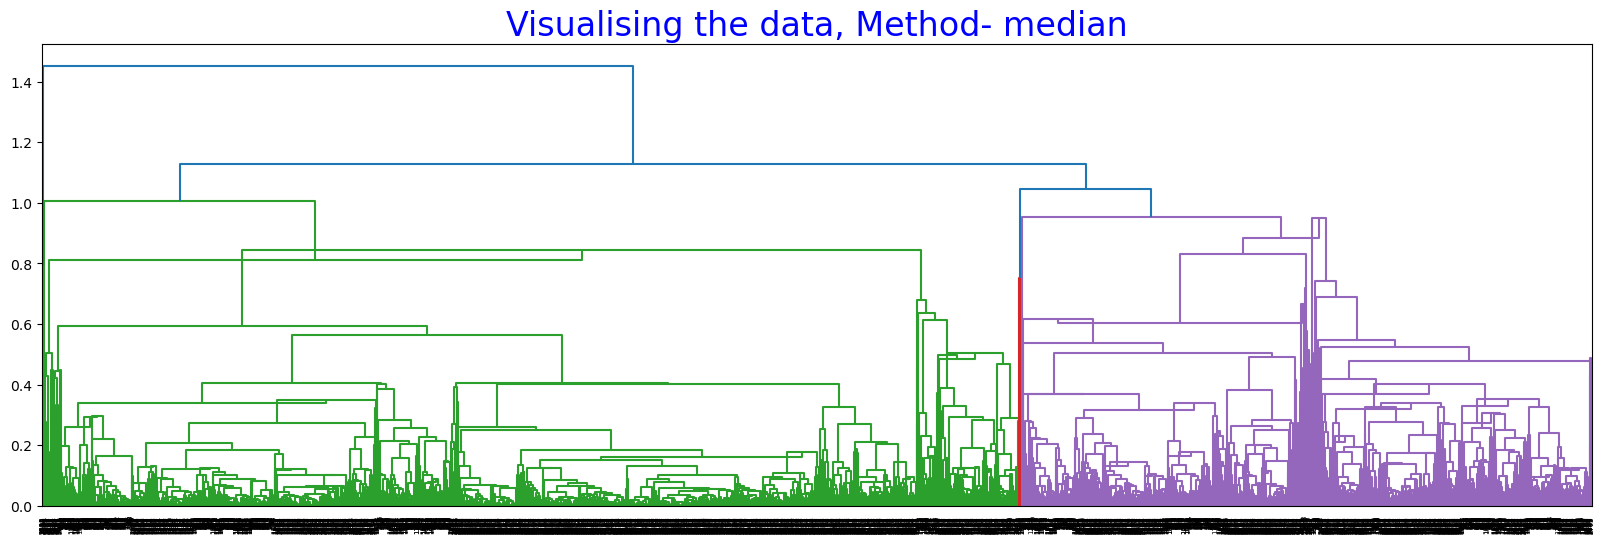

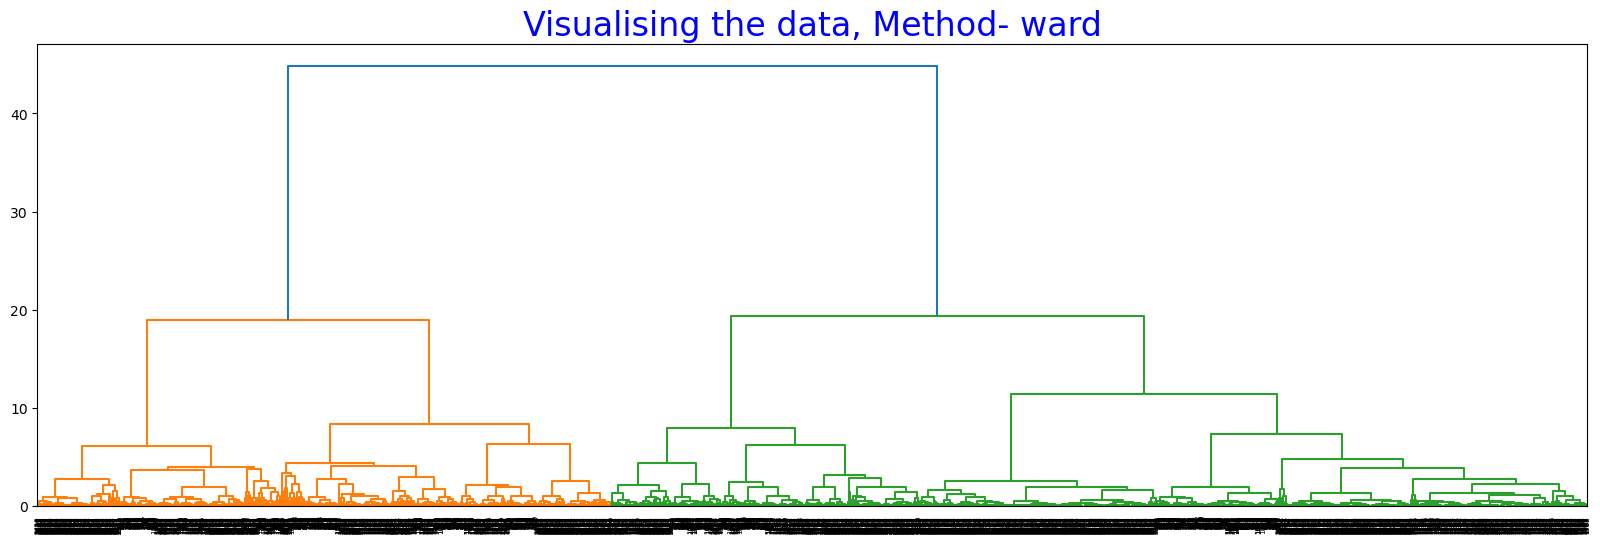

In [131]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(df_norm, method = methods,optimal_ordering=False))

## Silhouette_score for different methods using normalized data

In [134]:
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df_norm)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4927101572606319
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4370825531239449
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5324173657579796
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3758283642817004
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.43743326338040556
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.47277714481723876
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5309961006406463
For n

## silhouette_score for standardscaler data with different methods

In [135]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2891560488062143
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562622335599249

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2939395016802131
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760498283333268
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838424148089893
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350131896585496

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.308036175465823
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985292155693238
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7730785441296635
For n_

In [136]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [137]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
...,...
3993,0
3994,0
3995,0
3996,2


In [138]:
data = pd.concat([Airlines,Clusters],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,2.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,2.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,2.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,2.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0,0.0
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0,2.0
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0,2.0
3998,3016.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1398.0,0.0,NaN


In [139]:
data['Clusters'].value_counts()

2.0    2492
0.0    1471
1.0      31
3.0       4
Name: Clusters, dtype: int64

Text(0.5, 1.0, 'No of Clusters')

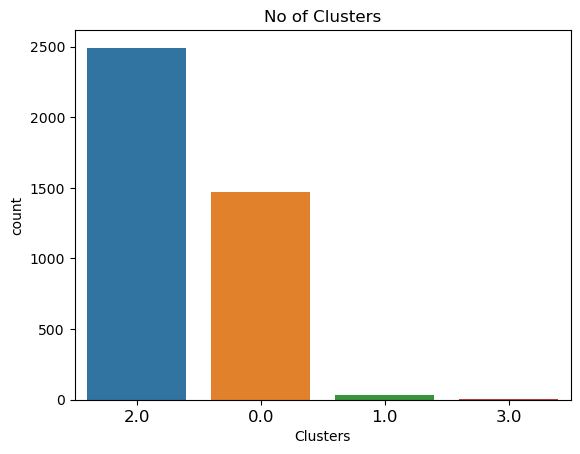

In [142]:
sns.countplot(x='Clusters', data=data, 
              order=data['Clusters'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('No of Clusters')

# DBScan Clustering

In [143]:
from sklearn.cluster import DBSCAN

In [144]:
# Create DBSCAN instance
dbscan = DBSCAN(eps=0.98, min_samples=3)

In [145]:
# Fit the model to your data
dbscan.fit(std_df)

DBSCAN(eps=0.98, min_samples=3)

In [146]:
# Fit the model to your data
dbscan.fit(df_norm)

DBSCAN(eps=0.98, min_samples=3)

In [147]:
# Fit the model to your data
dbscan.fit(minmax_df)

DBSCAN(eps=0.98, min_samples=3)

In [148]:
labels = dbscan.labels_

In [149]:
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [150]:
Cluster_db= pd.DataFrame(dbscan.labels_,columns=['Cluster ID'])
Cluster_db.value_counts()

Cluster ID
0             2517
1             1481
dtype: int64

In [151]:
db_data = pd.concat([df,Cluster_db],axis=1)
db_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1.0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1.0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0.0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0.0


Text(0.5, 1.0, 'No of Clusters')

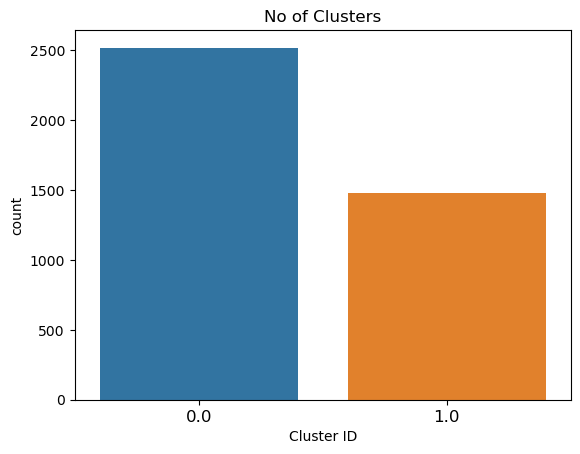

In [152]:
sns.countplot(x='Cluster ID', data=db_data, 
              order=db_data['Cluster ID'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('No of Clusters')

# Conclusion

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity. Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively. I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN. By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building. KMeans clustering is sensitive to outliers